# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [4]:
# Check for GPU
!nvidia-smi

Mon Oct  6 05:33:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.8.0+cu126


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. image classification
2. image detection (e.g. x-ray)
3. self-driving car

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

과적합(Overfitting)은 머신러닝에서 가장 흔하고 중요한 문제입니다. 쉽게 말해, 모델이 주어진 훈련 데이터에 너무 "달달 외워서" 실제 새로운 데이터에서는 성능이 떨어지는 현상을 말합니다.

Overfitting is like memorizing for a test but then you can't answer a question that's slightly different.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. 데이터 변형,증강
2. regularizaion
3. cross-validation
dropout

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
import torchvision
from torchvision import datasets
from torchvision import transforms

In [7]:
train_data = datasets.MNIST(root="data",
                            train=True,
                            download=True,
                            transform=transforms.ToTensor(),
                            target_transform=None
                            )

test_data = datasets.MNIST(root="data",
                            train=False,
                            download=True,
                            transform=transforms.ToTensor(),
                            target_transform=None
                            )



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 499kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.73MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 16.9MB/s]


In [8]:
len(train_data), len(test_data)

(60000, 10000)

In [32]:
class_names=train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

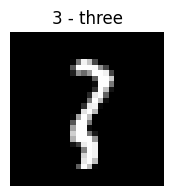

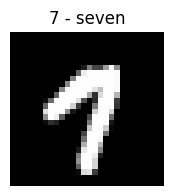

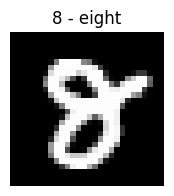

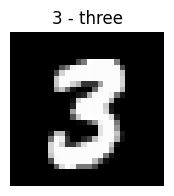

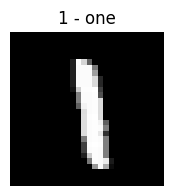

In [20]:
import matplotlib.pyplot as plt
rows=1
cols =5
for i in range(1,6):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img, label = train_data[random_idx]
  fig = plt.figure(figsize=(2,2))
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(train_data.classes[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [21]:
from torch.utils.data import DataLoader

batch_size = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=batch_size,
                              shuffle=True
                              )

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=batch_size,
                              shuffle=False
                              )

In [26]:
len(train_dataloader), len(test_dataloader)


(1875, 313)

In [29]:
img,label = next(iter(train_dataloader))
img.shape, label.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [58]:
from torch import nn
class MnistModel(nn.Module):
  def __init__(self,input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self,x):
    x =  self.conv_block1(x)
    #print(x.shape)
    x = self.conv_block2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x

In [59]:
model_2 = MnistModel(input_shape=1,
                     hidden_units=10,
                     output_shape=len(class_names)).to(device)
model_2

MnistModel(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [60]:
dummy_x = torch.rand(size=(1,1,28,28))
model_2(dummy_x.to(device))

tensor([[ 0.0271, -0.0080, -0.0155,  0.0040, -0.0172,  0.0137, -0.0282,  0.0345,
          0.0381,  0.0244]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [61]:
import requests
from pathlib import Path
# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper functions.py already exists,skipping download...")
else:
  print("Downloading helperfunctions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper functions.py already exists,skipping download...


In [68]:
model_cpu = MnistModel(input_shape=1,
                       hidden_units=10,
                       output_shape=10).to("cpu")

In [69]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cpu.parameters(),lr=0.1)

In [70]:

from tqdm.auto import tqdm

# Training loop
epochs = 5


for epoch in tqdm(range(epochs)):
  model_cpu.train()
  train_loss = 0
  for batch,(X,y) in enumerate(train_dataloader):
    X,y = X.to("cpu"),y.to("cpu")

    #forward pass
    y_logits = model_cpu(X)

    #calculate the loss
    loss =loss_fn(y_logits,y)
    train_loss +=loss


    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss/=len(train_dataloader)
  test_loss =0

  model_cpu.eval()
  with torch.inference_mode():

    for batch,(X_test,y_test) in enumerate(test_dataloader):
      X_test,y_test = X_test.to("cpu"), y_test.to("cpu")

      test_pred = model_cpu(X_test)
      test_loss += loss_fn(test_pred,y_test)
    test_loss/=len(test_dataloader)

  print(f"epchs:{epoch}\n Train loss: {train_loss:.4f} | test loss : {test_loss:.4f} ")

  0%|          | 0/5 [00:00<?, ?it/s]

epchs:0
 Train loss: 0.2494 | test loss : 0.0687 
epchs:1
 Train loss: 0.0703 | test loss : 0.0467 
epchs:2
 Train loss: 0.0551 | test loss : 0.0441 
epchs:3
 Train loss: 0.0469 | test loss : 0.0419 
epchs:4
 Train loss: 0.0416 | test loss : 0.0344 


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?